In [12]:
import numpy as np
import pandas as pd

import warnings
from matplotlib.colors import ListedColormap

warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics

In [19]:
novel_features = pd.read_csv("novel_features.csv", index_col = 0)
novel_features.head()

,Writer Name,Novel Name,Genre,Final Word Count,Daily Average,Winner,Synopses,url,Novel Date,Excerpt,...,num uniques,num sentences,paragraphs,fk score,has excerpt,num words excerpt,num uniques excerpt,num sentences excerpt,paragraphs excerpt,fk score excerpt
0,Nicaless,Novel: Lauren's Birthday,Young Adult,24229,807,0,\n<p></p>\n,http://nanowrimo.org/participants/nicaless/nov...,November 2015,\n<p></p>\n,...,0,0,0,0.00,0,0,0,0,0,0.00
1,Nicaless,Novel: A Mystery in the Kingdom of Aermon,Fantasy,50919,"1,697",1,\n<p>Hitoshi is appointed the youngest Judge a...,http://nanowrimo.org/participants/nicaless/nov...,November 2014,"\n<p>This story, funnily enough, started out a...",...,42,3,1,65.73,1,132,96,13,7,78.25
2,Rachel B. Moore,Novel: Finding Fortunato,Literary,50603,"1,686",1,\n<p>Sam and Anna Gold and their newly adoptiv...,http://nanowrimo.org/participants/rachel-b-moo...,November 2015,\n<p></p>\n,...,109,7,4,58.62,0,0,0,0,0,0.00
3,Rachel B. Moore,Novel: The Residency,Literary,50425,"1,680",1,\n<p>It's every writer's dream - an all-expens...,http://nanowrimo.org/participants/rachel-b-moo...,November 2014,\n<p></p>\n,...,51,4,3,65.73,0,0,0,0,0,0.00
4,Rachel B. Moore,Novel: The Jew From Fortunato,Literary Fiction,41447,"1,381",0,\n<p>20-something Andre Levinsky is a fish out...,http://nanowrimo.org/participants/rachel-b-moo...,November 2013,\n<p></p>\n,...,93,4,1,56.93,0,0,0,0,0,0.00


In [20]:
del novel_features['Novel Name']
del novel_features['Genre']
del novel_features['Final Word Count']
del novel_features['Daily Average']
del novel_features['Synopses']
del novel_features['url']
del novel_features['Excerpt']
novel_features.columns

Index([u'Writer Name', u'Winner', u'Novel Date', u'has genre',
       u'standard genre', u'has_synopses', u'num words', u'num uniques',
       u'num sentences', u'paragraphs', u'fk score', u'has excerpt',
       u'num words excerpt', u'num uniques excerpt', u'num sentences excerpt',
       u'paragraphs excerpt', u'fk score excerpt'],
      dtype='object')

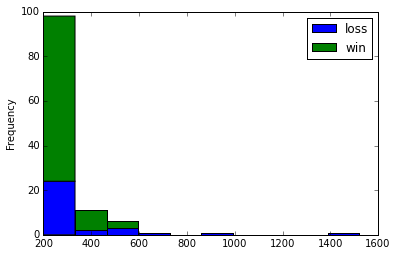

In [23]:
winlose = novel_features[novel_features['num words'] >= 200]
winlose = winlose.groupby("Winner")
df = pd.DataFrame({'loss': winlose['num words'].get_group(0), 'win': winlose['num words'].get_group(1)})
df.plot(kind='hist', stacked=True)

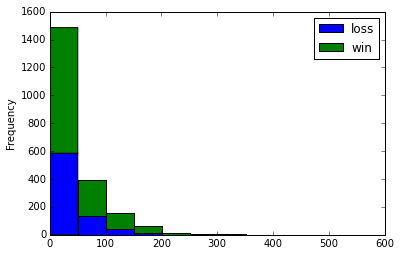

In [25]:
#winlose = novel_features[novel_features['num '] >= 200]
winlose = novel_features
winlose = winlose.groupby("Winner")
df = pd.DataFrame({'loss': winlose['num uniques'].get_group(0), 'win': winlose['num uniques'].get_group(1)})
df.plot(kind='hist', stacked=True)

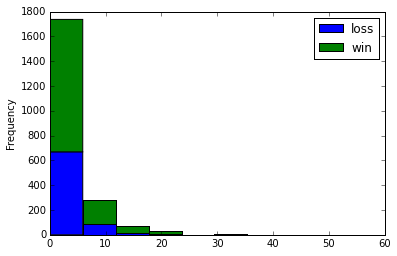

In [26]:
#winlose = novel_features[novel_features['num '] >= 200]
winlose = novel_features
winlose = winlose.groupby("Winner")
df = pd.DataFrame({'loss': winlose['num sentences'].get_group(0), 'win': winlose['num sentences'].get_group(1)})
df.plot(kind='hist', stacked=True)

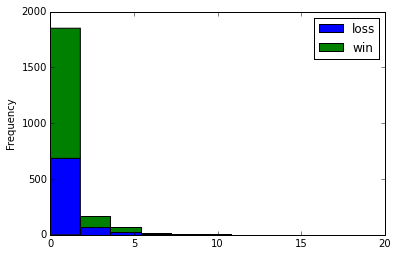

In [28]:
#winlose = novel_features[novel_features['num '] >= 200]
winlose = novel_features
winlose = winlose.groupby("Winner")
df = pd.DataFrame({'loss': winlose['paragraphs'].get_group(0), 'win': winlose['paragraphs'].get_group(1)})
df.plot(kind='hist', stacked=True)

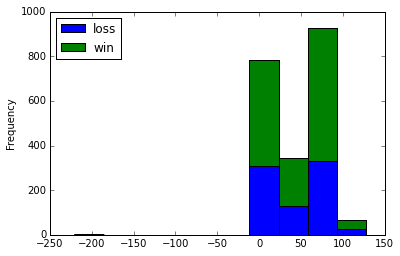

In [29]:
winlose = novel_features.groupby("Winner")
df = pd.DataFrame({'loss': winlose['fk score'].get_group(0), 'win': winlose['fk score'].get_group(1)})
df.plot(kind='hist', stacked=True)

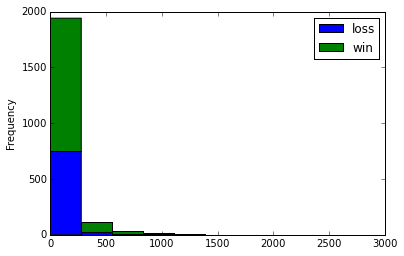

In [31]:
#winlose = novel_features[novel_features['num '] >= 200]
winlose = novel_features
winlose = winlose.groupby("Winner")
df = pd.DataFrame({'loss': winlose['num uniques excerpt'].get_group(0), 'win': winlose['num uniques excerpt'].get_group(1)})
df.plot(kind='hist', stacked=True)

In [ ]:
#winlose = novel_features[novel_features['num '] >= 200]
winlose = novel_features
winlose = winlose.groupby("Winner")
df = pd.DataFrame({'loss': winlose['num words excerpt'].get_group(0), 'win': winlose['num words excerpt'].get_group(1)})
df.plot(kind='hist', stacked=True)

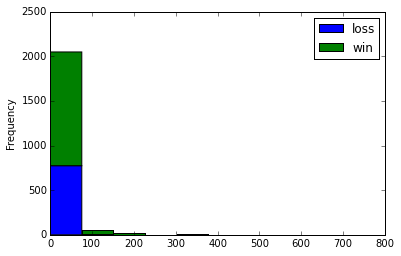

In [32]:
#winlose = novel_features[novel_features['num '] >= 200]
winlose = novel_features
winlose = winlose.groupby("Winner")
df = pd.DataFrame({'loss': winlose['num sentences excerpt'].get_group(0), 'win': winlose['num sentences excerpt'].get_group(1)})
df.plot(kind='hist', stacked=True)

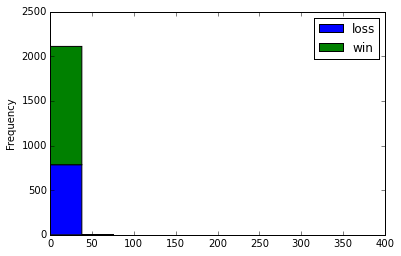

In [33]:
#winlose = novel_features[novel_features['num '] >= 200]
winlose = novel_features
winlose = winlose.groupby("Winner")
df = pd.DataFrame({'loss': winlose['paragraphs excerpt'].get_group(0), 'win': winlose['paragraphs excerpt'].get_group(1)})
df.plot(kind='hist', stacked=True)

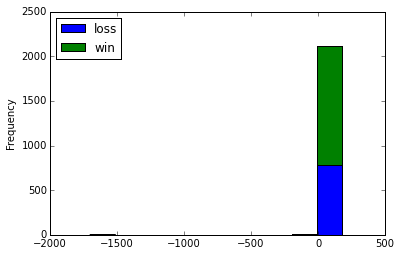

In [34]:
winlose = novel_features.groupby("Winner")
df = pd.DataFrame({'loss': winlose['fk score excerpt'].get_group(0), 'win': winlose['fk score excerpt'].get_group(1)})
df.plot(kind='hist', stacked=True)

In [35]:
excerpts = novel_features[novel_features['has excerpt'] == 0]
winners = len(excerpts[excerpts['Winner'] == 1])
nonwinners = len(excerpts[excerpts['Winner'] == 0])
print "The ratio of winners to nonwinners for those without excerpts is " + str( float(winners) / nonwinners)

The ratio of winners to nonwinners for those without excerpts is 1.60759493671


In [36]:
excerpts = novel_features[novel_features['has excerpt'] == 1]
winners = len(excerpts[excerpts['Winner'] == 1])
nonwinners = len(excerpts[excerpts['Winner'] == 0])
print "The ratio of winners to nonwinners for those with excerpts is " + str( float(winners) / nonwinners)

The ratio of winners to nonwinners for those with excerpts is 2.00632911392


In [37]:
synopsis = novel_features[novel_features['has_synopses'] == 0]
winners = len(synopsis[synopsis['Winner'] == 1])
nonwinners = len(synopsis[synopsis['Winner'] == 0])
print "The ratio of winners to nonwinners for those without synopses is " + str( float(winners) / nonwinners)

The ratio of winners to nonwinners for those without synopses is 1.52842809365


In [38]:
synopsis = novel_features[novel_features['has_synopses'] == 1]
winners = len(synopsis[synopsis['Winner'] == 1])
nonwinners = len(synopsis[synopsis['Winner'] == 0])
print "The ratio of winners to nonwinners for those with synopses is " + str( float(winners) / nonwinners)

The ratio of winners to nonwinners for those with synopses is 1.78411405295
